In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('house_info_scraped_with_geo_codes.csv', thousands='.',sep=';',decimal=',') # Change to ,sep=',' 
df.describe()


,Byggeår,Rum,Bad,Toilet,Plan,Boligareal,Kælder,Garage,Grundareal,Kontantpris,...,Carport,Udhus,Fritliggende overdækning,Etage,Depositum,Udestue,Ukendt bygning,latitude,longitude,distance to city
count,8.0000,8.000000,8.000000,8.00000,8.000000,8.00000,3.000000,2.000000,8.000000,7.000000e+00,...,3.000000,3.0,1.0,1.0,1.0,1.0,1.0,8.000000,8.000000,8.000000
mean,1967.2500,4.750000,1.500000,1.75000,1.750000,148.37500,393.333333,395.000000,5206.250000,5.724714e+06,...,340.000000,110.0,100.0,10.0,429.0,220.0,120.0,55.779981,10.935523,27.477822
std,38.7326,1.488048,0.534522,0.46291,0.886405,43.87299,110.151411,106.066017,3507.725545,6.150476e+06,...,101.488916,10.0,NaN,NaN,NaN,NaN,NaN,0.335212,1.462270,39.495324
min,1922.0000,3.000000,1.000000,1.00000,1.000000,96.00000,280.000000,320.000000,109.000000,1.945000e+06,...,230.000000,100.0,100.0,10.0,429.0,220.0,120.0,55.348780,8.462160,2.755030
25%,1928.2500,4.000000,1.000000,1.75000,1.000000,123.75000,340.000000,357.500000,2453.250000,2.895000e+06,...,295.000000,105.0,100.0,10.0,429.0,220.0,120.0,55.467083,10.261043,8.087273
50%,1973.0000,4.000000,1.500000,2.00000,1.500000,134.00000,400.000000,395.000000,6405.000000,3.850000e+06,...,360.000000,110.0,100.0,10.0,429.0,220.0,120.0,55.805230,10.516380,13.864345
75%,1992.5000,5.500000,2.000000,2.00000,2.250000,172.00000,450.000000,432.500000,8190.000000,4.496500e+06,...,395.000000,115.0,100.0,10.0,429.0,220.0,120.0,56.016253,12.448395,23.382780
max,2023.0000,7.000000,2.000000,2.00000,3.000000,234.00000,500.000000,470.000000,8520.000000,1.949500e+07,...,430.000000,120.0,100.0,10.0,429.0,220.0,120.0,56.226690,12.585930,122.405610


In [30]:
def convert_nan_to_bool(value):
    return 0 if np.isnan(value) else 1

def process_dataframe(df):
    # Drop rows where 'Udbudsfor' is 'Leje'
    df = df[df['Udbudsform'] != 'Leje']
    df = df.replace('nan', np.nan).replace('NaN', np.nan)
    # Drop columns with insufficient data
    columns_to_drop = df.columns[df.count() < 50]
    df = df.drop(columns=columns_to_drop)
        
    # Fill missing values in 'Kontantpris' with 'Teknisk Pris'
    df.Kontantpris.fillna(df['Teknisk Pris'], inplace=True)

    # Combine and convert specific columns to boolean
    df['Udhus'] = df['Udestue'] + df['Udhus']
    df['Garage'] = df['Garage'] + df['Carport']

    # Combine and convert specific columns to boolean
    df['Udhus'] = (df['Udestue'] + df['Udhus']).apply(lambda x: 0 if x < 1 else 1)
    df['Kælder'] = df['Kælder'].apply(convert_nan_to_bool)
    df['Carport'] = df['Carport'].apply(convert_nan_to_bool)
    df['Garage'] = df['Garage'].apply(convert_nan_to_bool)
    df['Drivhus'] = df['Drivhus'].apply(convert_nan_to_bool)
    df['Erhverv'] = df['Erhverv'].apply(convert_nan_to_bool)


    # Drop unnecessary columns
    columns_to_drop = ['Udbudsform','Unnamed: 0','Fritliggende overdækning','Udestue','Købspris','Ydelse',\
                       'Tiloversbleven landbrugsbygning','Bad','Ombygget','Carport','Teknisk Pris','Road',\
                       'City','Road1','address','zip code','full_address','latitude','longitude','description']
    filtered_df = df.drop(columns=columns_to_drop)
    
    return filtered_df


# Preprocess the dataframe, df.
filtered_df = process_dataframe(df)

for column in filtered_df.columns:
    print(f"Number of non-null values in '{column}': {filtered_df[column].count()}")


Number of non-null values in 'Type': 4972
Number of non-null values in 'Energimærke': 4364
Number of non-null values in 'Varmekilde': 4883
Number of non-null values in 'Byggeår': 4834
Number of non-null values in 'Rum': 4777
Number of non-null values in 'Toilet': 4799
Number of non-null values in 'Plan': 4304
Number of non-null values in 'Boligareal': 4843
Number of non-null values in 'Kælder': 4972
Number of non-null values in 'Udhus': 4972
Number of non-null values in 'Grundareal': 4590
Number of non-null values in 'Kontantpris': 4663
Number of non-null values in 'Ejerudgift': 4593
Number of non-null values in 'Etage': 799
Number of non-null values in 'Garage': 4972
Number of non-null values in 'Drivhus': 4972
Number of non-null values in 'Erhverv': 4972
Number of non-null values in 'distance to city': 4972
Number of non-null values in 'closest city': 4874


In [33]:
import re
import pandas as pd

# Assuming 'filtered_df' is defined, create a copy of the filtered DataFrame
clean_df = filtered_df.copy()

# Define a dictionary to map values to target values
porperty_type_mapping = {
    'Fritidsbolig / Villa': 'Villa',
    'Villa': 'Villa',
    'Lejlighed':'Lejlighed',
    'Helårsgrund':'Grund',
    'Rækkehus':'Rækkehus',
    'Andelsbolig':'Andelsbolig',
    'Landejendom':'Villa',
    'Villa / Fritidsbolig': 'Villa',
    'Fritidsbolig':'Fritidsbolig',
    'Fritidsbolig / Fritidsgrund': 'Fritidsbolig',
    'Villalejlighed': 'Lejlighed',
    'Lejlighed / Villalejlighed': 'Lejlighed',
    'Landejendom / Villa': 'Villa',
    'Villa / Landejendom': 'Villa',
    'Rækkehus / Fritidsbolig': 'Rækkehus',
    'Villa / Helårsgrund': 'Villa',
    'Fritidsbolig / Helårsgrund': 'Grund',
    'Landejendom / Fritidsbolig': 'Villa',
    'Helårsgrund / Fritidsgrund': 'Grund'
}

# Map the values in the 'property_type' column to target values
clean_df['property_type'] = clean_df['Type'].map(porperty_type_mapping)

# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the entire column 'Energimærke'
clean_df['Energimærke'] = clean_df['Energimærke'].astype('str').apply(remove_numbers)

# Define a list of target values for energy sources
target_values = ['varmepumpe', 'brændeovn', 'fyr','fjernvarm','olie','jord','gas','central','ovn','el','pille']

# Create a regex pattern from target_values
pattern = '(' + '|'.join(map(re.escape, target_values)) + ')'

# Extract matching values using str.extract and create 'energi' column
clean_df['energi'] = clean_df['Varmekilde'].str.lower().str.extract(pattern, expand=False)

# Define a dictionary to map values to target heating source values
energy_source_mapping = {
    'varmepumpe': 'clean_renewable',
    'brændeovn': 'non_renewable',
    'fyr': 'non_renewable',
    'central' :'clean_renewable',
    'el':'clean_renewable',
    'olie': 'non_renewable',
    'fjernvarm': 'clean_renewable',
    'olie': 'non_clean',
    'jord': 'clean_renewable',
    'gas': 'non_renewable',
    'ovn': 'non_clean',
    'pille':'non_clean',
    'brændeovn':'non_clean'
}

# Map the values in the 'energi' column to target heating sources
clean_df['heating_source'] = clean_df['energi'].map(energy_source_mapping)

clean_df = clean_df.drop(columns=['energi', 'Type','Varmekilde'])



Index(['Energimærke', 'Byggeår', 'Rum', 'Toilet', 'Plan', 'Boligareal',
       'Kælder', 'Udhus', 'Grundareal', 'Kontantpris', 'Ejerudgift', 'Etage',
       'Garage', 'Drivhus', 'Erhverv', 'distance to city', 'closest city',
       'property_type', 'heating_source'],
      dtype='object')

In [40]:
### Create dummies for non-numeric variables
data_with_dummies = pd.get_dummies(clean_df, \
                                   prefix=['Energimærke','Kælder','Udhus','Garage','Drivhus','Erhverv','closest city'],\
                                    columns=['Energimærke','Kælder','Udhus','Garage','Drivhus','Erhverv','closest city'],\
                                        drop_first=True)

print(data_with_dummies)

# Export the DataFrame to CSV
#data_with_dummies.to_csv('cleaned_data.csv', index=False, sep=';')


      Byggeår   Rum  Toilet  Plan  Boligareal Grundareal  Kontantpris  \
0     19760.0  40.0    20.0  20.0      1460.0        930    3495000.0   
1     19060.0  40.0    10.0  10.0      1190.0      1.340    1795000.0   
2     20110.0  40.0    10.0  10.0      1070.0        NaN    4750000.0   
3     19980.0  50.0    20.0  10.0      1450.0        802    2195000.0   
4     19590.0  70.0    20.0  20.0      2410.0        935    3595000.0   
...       ...   ...     ...   ...         ...        ...          ...   
5065  19400.0  30.0    20.0   NaN       920.0      4.442    3250000.0   
5066  19110.0  20.0    20.0  20.0      2440.0     30.619    1995000.0   
5067  20170.0  60.0    20.0  10.0      2390.0      1.142    5995000.0   
5068  18900.0  70.0    10.0  10.0      2320.0     3,1 ha    2300000.0   
5069  18980.0  40.0    10.0  20.0      1210.0      3.465     945000.0   

      Ejerudgift Etage  distance to city  ... Energimærke_F Energimærke_G  \
0         2979.0   NaN      6.309379e+15  ... 

In [24]:
import folium
import pandas as pd


# Denmark's approximate center coordinates
denmark_center = (56.2639, 9.5018)

# Create a folium map centered on Denmark
denmark_map = folium.Map(location=denmark_center, zoom_start=7)
# Function to plot coordinates on the map
def plot_coordinates_on_map(row):
    try:
        latitude = float(row['latitude'])
        longitude = float(row['longitude'])
        folium.Marker([latitude, longitude]).add_to(denmark_map)
    except (ValueError, TypeError):
        pass  # Skip invalid coordinates

# Plot coordinates from the DataFrame
df.apply(plot_coordinates_on_map, axis=1)

# Save the map to an HTML file
denmark_map.save('denmark_coordinates_map.html')

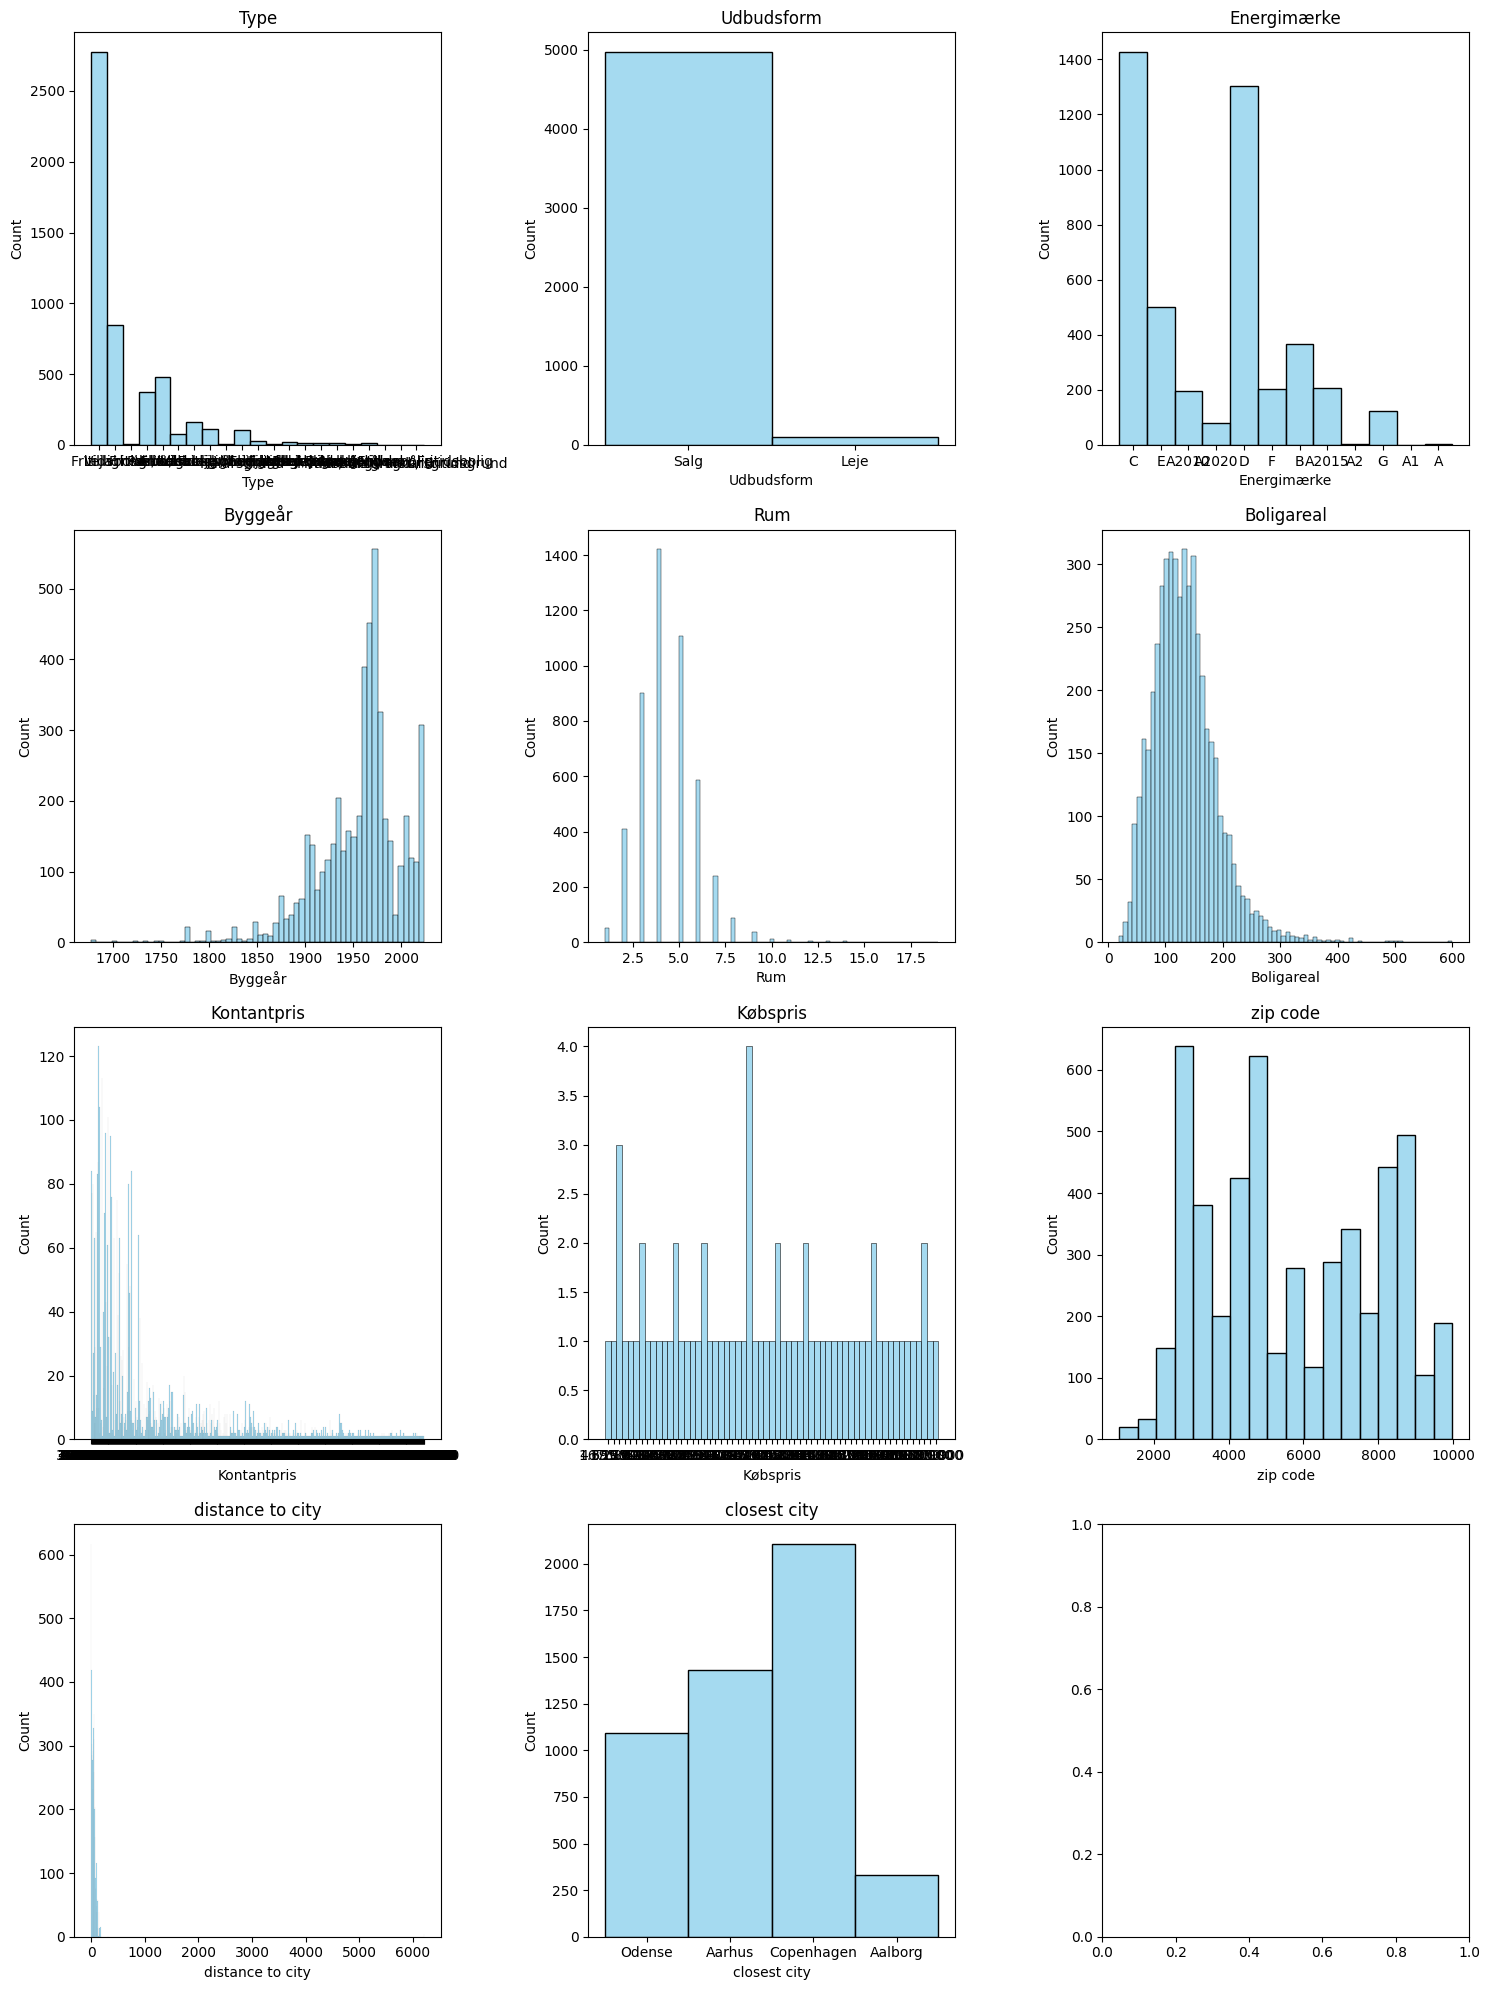

In [12]:
# for column in df.columns:
#     print(column)
columns_to_plot = ['Type', 'Udbudsform', 'Energimærke', 'Byggeår', 'Rum', 
                   'Boligareal', 'Kontantpris', 'Købspris', 'zip code', 
                   'distance to city', 'closest city']

# Calculate the number of rows and columns in the subplot grid
num_columns = 3
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop through the columns and create histograms in each subplot
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df[column], kde=False, color="skyblue", ax=axes[i])
    axes[i].set_title(column)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# sns.histplot(data=df['Type'], kde=False, color="skyblue")
# sns.histplot(data=df['Udbudsform'], kde=False, color="skyblue")
# sns.histplot(data=df['Energimærke'], kde=False, color="skyblue")
# sns.histplot(data=df['Byggeår'], kde=False, color="skyblue")
# sns.histplot(data=df['Rum'], kde=False, color="skyblue")
# sns.histplot(data=df['Boligareal'], kde=False, color="skyblue")
# sns.histplot(data=df['Kontantpris'], kde=False, color="skyblue")
# sns.histplot(data=df['Købspris'], kde=False, color="skyblue")
# sns.histplot(data=df['zip code'], kde=False, color="skyblue")
# sns.histplot(data=df['distance to city'], kde=False, color="skyblue")
# sns.histplot(data=df['closest city'], kde=False, color="skyblue")
# sns.histplot(data=df[column], kde=False, color="skyblue")
# sns.histplot(data=df[column], kde=False, color="skyblue")
